In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


y_train[7] 3


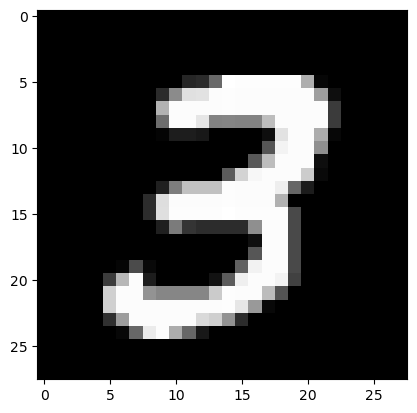

In [22]:
print("y_train[7]", y_train[7])
plt.imshow(x_train[7], cmap='gray')


In [23]:
# Normalize the pixel values to be between 0 and 1
# This is a common preprocessing step for neural networks
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
# Define a simple feedforward neural network model
layers = tf.keras.layers
models = tf.keras.models
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
# The optimizer, loss function, and metrics are specified here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Fit the model to the training data
# This trains the model for a specified number of epochs
# Note: The number of epochs can be adjusted based on the dataset and model complexity
# Backpropagation is used to update the model weights
print("Training the model...")
history = model.fit(x_train, y_train, epochs=5)

Training the model...
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3679 - accuracy: 0.8953
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3158 - accuracy: 0.9130
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3209 - accuracy: 0.9122
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3261 - accuracy: 0.9122
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3441 - accuracy: 0.9097


In [ ]:
# Evaluate the model on the test data
# This provides the final accuracy and loss on unseen data
print("Evaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.3776 - accuracy: 0.9051
Test accuracy: 90.51%


In [ ]:
# Make predictions on the test data
# This generates the model's predictions for the test set
predictions = model.predict(x_test)
print(predictions)
print('Predictions Shape - ', predictions.shape)

313/313 [==============================] - 1s 2ms/step
[[9.0332335e-08 3.6464726e-15 1.1816609e-07 ... 9.9754071e-01
  1.5246171e-06 6.8914866e-05]
 [9.1058570e-07 2.5008315e-09 9.9873620e-01 ... 1.3472490e-27
  4.3226206e-05 2.5024889e-19]
 [1.8990059e-08 9.9802977e-01 9.8089210e-04 ... 7.0942537e-05
  5.3317589e-04 3.7676255e-05]
 ...
 [3.2536387e-12 2.3052543e-11 1.4040916e-08 ... 3.6732337e-05
  1.3290916e-03 6.6034463e-03]
 [2.7451226e-09 1.0252108e-08 2.7641265e-09 ... 1.3189997e-09
  2.2063734e-02 5.5555930e-08]
 [3.3215521e-09 6.6228685e-23 2.7244419e-05 ... 3.8541161e-18
  7.7883966e-10 1.4873935e-15]]
Predictions Shape -  (10000, 10)


In [12]:
predictions[0]

array([9.0332335e-08, 3.6464726e-15, 1.1816609e-07, 2.3785064e-03,
       2.8163566e-08, 1.0028224e-05, 6.7979451e-15, 9.9754071e-01,
       1.5246171e-06, 6.8914866e-05], dtype=float32)

In [13]:
print(np.argmax(predictions[49]))

4


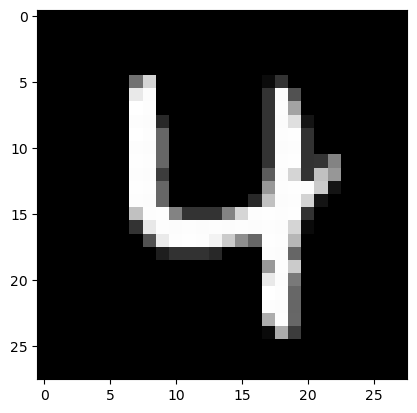

In [14]:
plt.imshow(x_test[49], cmap='gray')

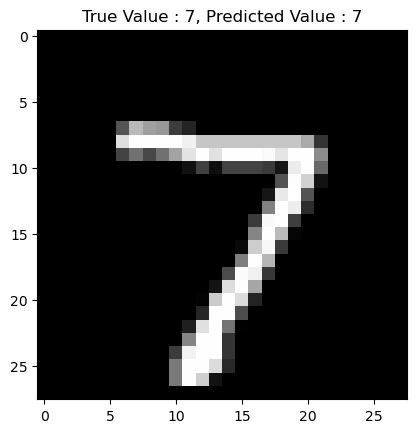

In [15]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()

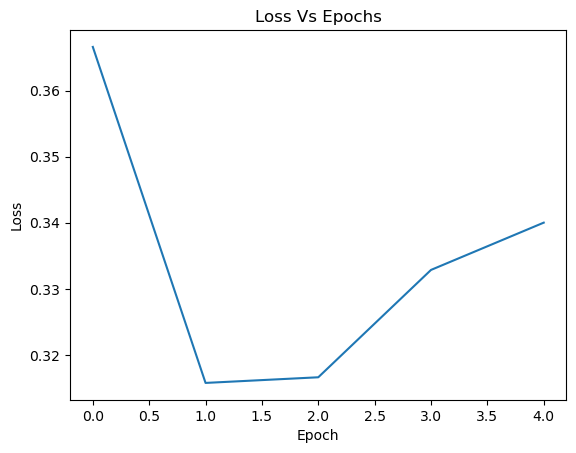

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')
plt.show()

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
y_test.shape

(10000,)